**Convolutional Neural Network With TenserFlow + Keras**

Import Library yang dibutuhkan

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [0]:
#Download datanya
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Mari kita cek Jumlah data dan sizenya

In [0]:
xtrain.shape

(60000, 28, 28)

In [0]:
xtest.shape

(10000, 28, 28)

Terdapat 60.000 Gambar data training dan 1000 gambar data testing dengan size 28 x 28 piksel

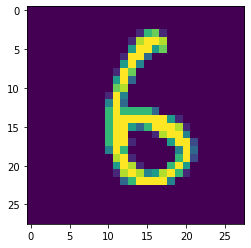

In [0]:
#coba cek gambarnya
plt.imshow(xtest[3000])

In [0]:
ytest[3000]

6

In [0]:
#cek ytrain masih berupa numerical
ytrain[3000]

9

In [0]:
xtrain = xtrain.reshape(60000, 28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [0]:
#konversi ytrain dan ytest dari numerical ke ctegorical
ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

Buat Model CNN nya

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))


Liat Bentuk Modelnya

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

Compile Modelnya

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

Waktunya Mentraining

In [0]:
model.fit(xtrain, ytrain, 
          batch_size=128, 
          epochs=5, 
          verbose=1,
          validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 388us/step - loss: 0.5879 - accuracy: 0.9159 - val_loss: 0.0555 - val_accuracy: 0.9832
Epoch 2/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.0875 - accuracy: 0.9747 - val_loss: 0.0407 - val_accuracy: 0.9875
Epoch 3/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.0604 - accuracy: 0.9823 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 4/5
60000/60000 [==============================] - 17s 280us/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0287 - val_accuracy: 0.9909
Epoch 5/5
60000/60000 [==============================] - 17s 280us/step - loss: 0.0373 - accuracy: 0.9894 - val_loss: 0.0293 - val_accuracy: 0.9914


Coba Predict

In [0]:
model.predict(xtest[3000].reshape(1,28,28,1))

array([[2.1034556e-10, 5.8451620e-12, 7.7228241e-13, 3.3212300e-12,
        3.1688815e-11, 4.1273256e-07, 9.9999917e-01, 1.5834323e-13,
        4.7108841e-07, 4.6402483e-12]], dtype=float32)

In [0]:
ytest[3000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)